<h1 style='color: blue; font-size: 36px; font-weight: bold;'>Data Science - Visualizando dados</h1>

### Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")


### Importando dados dos passageiros do Titanic a partir do [kaggle](https://www.kaggle.com/c/titanic/)

#### Como os dados são divididos em treino e teste, teremos que concatenar os DataFrames e fazer algumas modificações.

In [2]:
dados_treino = pd.read_csv('train.csv')

dados_teste = pd.read_csv('test.csv')
dados_teste['Survived'] = pd.read_csv('gender_submission.csv')['Survived']


In [3]:
dados = pd.concat([dados_treino, dados_teste])
dados.set_index('PassengerId', inplace=True)
dados.to_csv('dados.csv')
dados


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### Criando dicionários para relacionar com os dados do DataFrame

In [4]:
sobreviveu = {0: 'Não',
              1: 'Sim'}

classe = {1: 'Primeira Classe',
          2: 'Segunda Classe',
          3: 'Terceira Classe'}

porto_de_embarcacao = {'C': 'Cherbourg',
                       'Q':   'Queenstown',
                       'S': 'Southampton'}

sexo = {'male': 'Masculino',
        'female': 'Feminino'}


### Visualizando a quantidade de passageiros por sexo

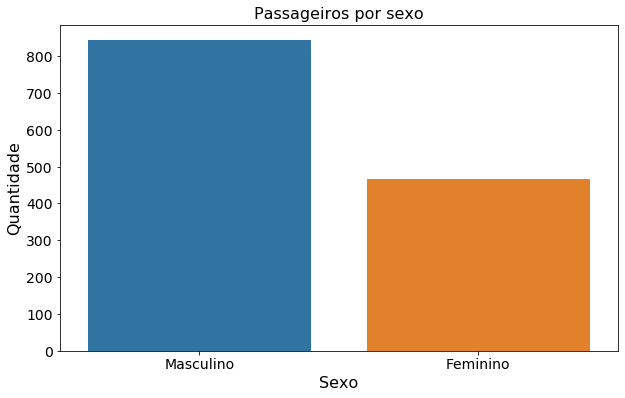

In [5]:
quantidade_sexo = dados.Sex.value_counts()

# Usando função barplot()
ax = sns.barplot(y=quantidade_sexo.values,x=quantidade_sexo.index)
ax.figure.set_size_inches(10, 6)
ax.set_title('Passageiros por sexo', fontsize=16)
ax.set_xlabel('Sexo', fontsize=16)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_xticklabels(sexo.values())
ax.tick_params(labelsize=14)

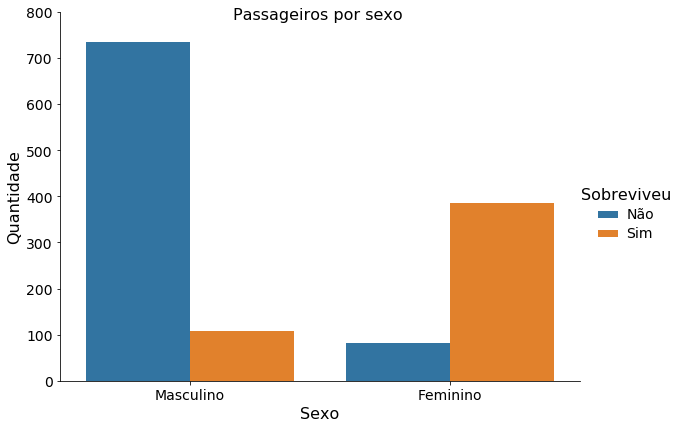

In [8]:
# Usando função catplot()
ax = sns.catplot(data=dados, x='Sex', kind='count',
                 hue='Survived', legend=True)
ax.figure.set_size_inches(10, 6)
ax.fig.suptitle('Passageiros por sexo', fontsize=16)
ax.set_xlabels('Sexo', fontsize=16)
ax.set_ylabels('Quantidade', fontsize=16)
ax.set_xticklabels(sexo.values(), fontsize=14)
ax.set_yticklabels(fontsize=14)


ax.legend.set_title('Sobreviveu')
ax.legend.get_title().set_fontsize(16)
for leg, sex in zip(ax.legend.texts, sobreviveu.values()):
    leg.set_text(sex)
    leg.set_fontsize(14)